In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_prediction.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

###  year has many non - year values
### year to object 
### in price column remove 'ask for price' 
### and convert to int 
### kms_driven -> remove ',' and 'kms' and nan values and convert to int
### fuel_type has nan values 
### keep 1st three words of name 

# cleaning the data

In [7]:
backup = df.copy()

In [8]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
df =  df[df['year'].str.isnumeric()]

In [10]:
df['year'] = df['year'].astype(int)

In [11]:
 df = df[df['Price'] != 'Ask For Price']

In [12]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [14]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [15]:
df = df[df['kms_driven'].str.isnumeric()]

In [16]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [18]:
df = df[~df['fuel_type'].isna()]

In [19]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [20]:
df = df.reset_index(drop=True)

In [21]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [22]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [23]:
df[df['Price'] > 6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [24]:
df = df[df['Price']<6e6].reset_index(drop=True)

In [25]:
#df.to_csv('cleaned.csv')

# model 


In [26]:
x = df.drop(columns = 'Price')
y = df['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.metrics import r2_score

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [34]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False,categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [35]:
lr = LinearRegression()

In [36]:
pipe = make_pipeline(column_trans,lr)

In [37]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [38]:
y_pred = pipe.predict(x_test)

In [39]:
y_pred

array([-2.64712222e+11,  7.51700293e+05,  3.26499120e+05, -1.22174720e+11,
        3.88787235e+05, -2.64712137e+11,  5.06204100e+05,  2.63480276e+05,
        5.24467459e+05,  3.21711814e+05,  6.34460588e+05, -2.64711851e+11,
       -7.94136612e+11,  2.29023501e+05, -1.22174737e+11,  2.54503253e+05,
       -1.22174788e+11, -3.85861245e+04,  9.77877119e+04,  4.63197991e+05,
        7.49147593e+04, -2.64712179e+11,  3.43325475e+05,  2.25643374e+05,
        1.00637308e+05,  3.48281507e+05,  9.91707271e+04,  4.74562787e+05,
        6.06093871e+05,  4.85355817e+05,  4.67443933e+05,  3.40538326e+05,
        1.56608305e+06, -3.97068145e+11,  5.68655370e+05,  2.28495441e+05,
        2.07716656e+05,  5.85771907e+05,  7.51450391e+04,  1.88995090e+06,
        1.67292719e+05,  1.16037384e+05,  6.65758891e+05,  2.63480276e+05,
       -5.40014097e+04,  1.21289942e+05,  6.63137483e+05, -2.64712131e+11,
        5.92916848e+05, -5.90066433e+13,  3.86406974e+05,  5.24970373e+05,
        2.54270033e+05, -

In [40]:
r2_score(y_test,y_pred)

-259651508566655.44

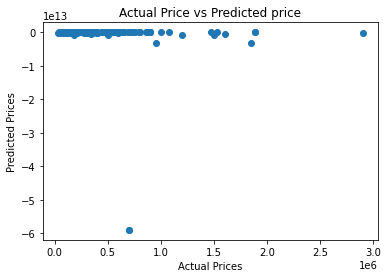

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted price")
plt.show()

In [42]:
score = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    #print(r2_score(y_test,y_pred), i)
    score.append(r2_score(y_test,y_pred))

In [43]:
import numpy as np

In [44]:
np.argmax(score)

515

In [45]:
score[np.argmax(score)]

0.8703431148176993

In [46]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [47]:
#from sklearn.externals import joblib

In [48]:
import joblib


In [49]:
joblib.dump(pipe,'carPrediction')

['carPrediction']

In [50]:
#modelReload = joblib.load('carPrediction.pkl')

In [51]:
#modelReload.predict(x_test)

In [52]:
pip install -U scikit-learn


  Using cached scikit_learn-1.2.1-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.16.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [53]:
pip install --user scikit-learn

In [54]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.2.1-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.16.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [55]:
sudo pip install joblib



SyntaxError: invalid syntax (<ipython-input-55-0176fbc89e0b>, line 1)